# Travaux pratiques : Équations différentielles
## Introduction


## Implémentation des solvers

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [2]:
def runge_kutta_1_etage(fprime, y0, ts):
    try:
        ys = np.empty((len(ts), len(y0)))
    except TypeError:
        ys = np.empty(len(ts))
    ys[0] = y0
    for n in range(len(ts)-1):
        delta_t = ts[n+1]-ts[n]
        ys[n+1] = ys[n] + np.multiply(delta_t, fprime(ys[n], ts[n]))
    return ys

In [3]:
def runge_kutta_2_etages(fprime, y0, ts):
    try:
        ys = np.empty((len(ts), len(y0)))
    except TypeError:
        ys = np.empty(len(ts))
    ys[0] = y0
    for n in range(len(ts)-1):
        delta_t = ts[n+1]-ts[n]
        delta_t2 = (delta_t/2)
        fprime_n = fprime(ys[n], ts[n])
        ys[n+1] = ys[n] + np.multiply(delta_t, fprime(ys[n] + np.multiply(delta_t2, fprime_n), ts[n] + delta_t2))
    return ys

## Validation des solvers

In [4]:
y0 = 10
C = 50
v = 1
F = lambda y, t: v*(1-np.divide(y,C))*y
y = lambda t: C/(1+((C-y0)/y0)*np.exp(np.multiply(-v,t)))


In [5]:
def delta_t_to_ts(delta_t, t0=0, tmax=10):
    return np.arange(t0, tmax, delta_t)

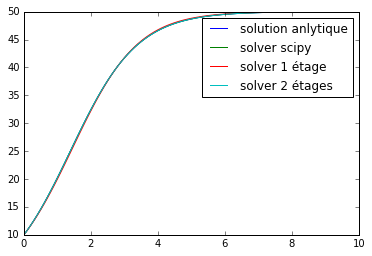

In [6]:
tmax = 10
ts = delta_t_to_ts(0.1, tmax=tmax)
value_y = y(ts)
value_runge_kutta_1 = runge_kutta_1_etage(F, y0, ts)
value_runge_kutta_2 = runge_kutta_2_etages(F, y0, ts)
value_scipy = odeint(F, y0, ts)[:, 0]
plt.plot(ts, value_y, label="solution anlytique")
plt.plot(ts, value_scipy, label="solver scipy")
plt.plot(ts, value_runge_kutta_1, label="solver 1 étage")
plt.plot(ts, value_runge_kutta_2, label="solver 2 étages")
plt.legend(loc='best');

## Étude de convergence des solvers

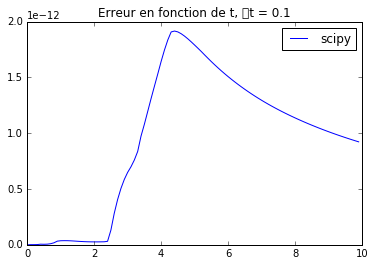

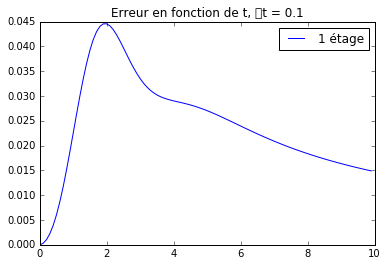

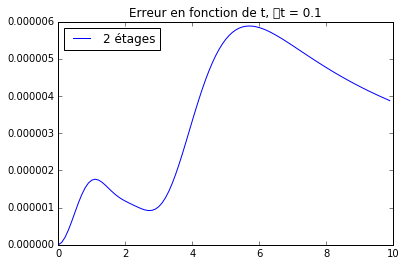

In [7]:
def compute_errors(values1, values2):
    diff = np.abs(values1-values2)
    diff_square = diff*diff
    errors = np.cumsum(diff_square)
    for i,v in enumerate(errors):
        errors[i] = v/(i+1)
    return errors

errors_scipy = compute_errors(value_y, value_scipy)
errors_runge_kutta_1 = compute_errors(value_y, value_runge_kutta_1)
errors_runge_kutta_2 = compute_errors(value_y, value_runge_kutta_2)
plt.plot(ts, errors_scipy, label="scipy")
plt.legend(loc="best")
plt.title("Erreur en fonction de t, δt = 0.1");
plt.figure()
plt.plot(ts, errors_runge_kutta_1, label="1 étage")
plt.legend(loc="best")
plt.title("Erreur en fonction de t, δt = 0.1");
plt.figure()
plt.plot(ts, errors_runge_kutta_2, label="2 étages")
plt.legend(loc="best")
plt.title("Erreur en fonction de t, δt = 0.1");

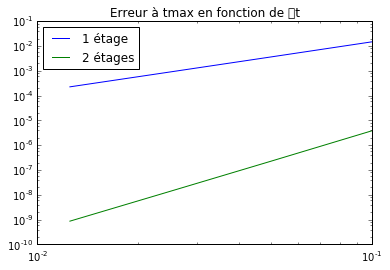

In [8]:
delta_ts = [0.1, 0.05, 0.025, 0.0125]
errors_runge_kutta_1 = np.zeros_like(delta_ts)
errors_runge_kutta_2 = np.zeros_like(delta_ts)

y_tmax = y(tmax)
for i, delta_t in enumerate(delta_ts):
    ts = delta_t_to_ts(delta_t, tmax=tmax)
    value_y = y(ts)
    errors_runge_kutta_1[i] = compute_errors(value_y, runge_kutta_1_etage(F, y0, ts))[-1]
    errors_runge_kutta_2[i] = compute_errors(value_y, runge_kutta_2_etages(F, y0, ts))[-1]

plt.loglog(delta_ts, errors_runge_kutta_1, label="1 étage")
plt.loglog(delta_ts, errors_runge_kutta_2, label="2 étages")
plt.legend(loc="best")
plt.title("Erreur à tmax en fonction de δt");

## Équation de Lorenz

In [9]:
beta = 8/3
sigma = 10
rho = 28

def lorenz(y,t):
    yx = y[0]
    yy = y[1]
    yz = y[2]
    dyx = sigma*(yy - yx)
    dyy = yx * (rho - yz) - yy
    dyz = yy * yx - beta*yz
    return [dyx, dyy, dyz]

ts_lorenz = delta_t_to_ts(0.001, tmax=1.5586522)
ts_lorenz = delta_t_to_ts(0.0001, tmax=20*1.5586522)
y0_lorenz = [-0.9101673912, -1.922121396, 18.18952097]
lorenz_runge_kutta_1 = runge_kutta_1_etage(lorenz, y0_lorenz, ts_lorenz)
lorenz_runge_kutta_2 = runge_kutta_2_etages(lorenz, y0_lorenz, ts_lorenz)
lorenz_scipy = odeint(lorenz, y0_lorenz, ts_lorenz)

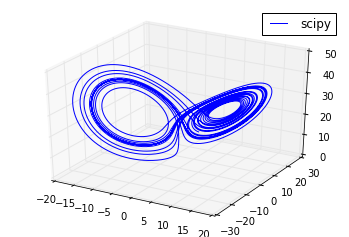

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(lorenz_scipy[:, 0], lorenz_scipy[:, 1], lorenz_scipy[:, 2], label="scipy")
#ax.plot(lorenz_runge_kutta_1[:, 0], lorenz_runge_kutta_1[:, 1], lorenz_runge_kutta_1[:, 2], label="1 étage")
#ax.plot(lorenz_runge_kutta_2[:, 0], lorenz_runge_kutta_2[:, 1], lorenz_runge_kutta_2[:, 2], label="2 étages")
ax.legend()

## Conclusion